**ΟΜΑΔΑ 33**

*   Κιζιρίδης Δημήτριος ΑΕΜ: 10539
*   Μπίλλας Θωμάς Αχιλλέας ΑΕΜ: 10366


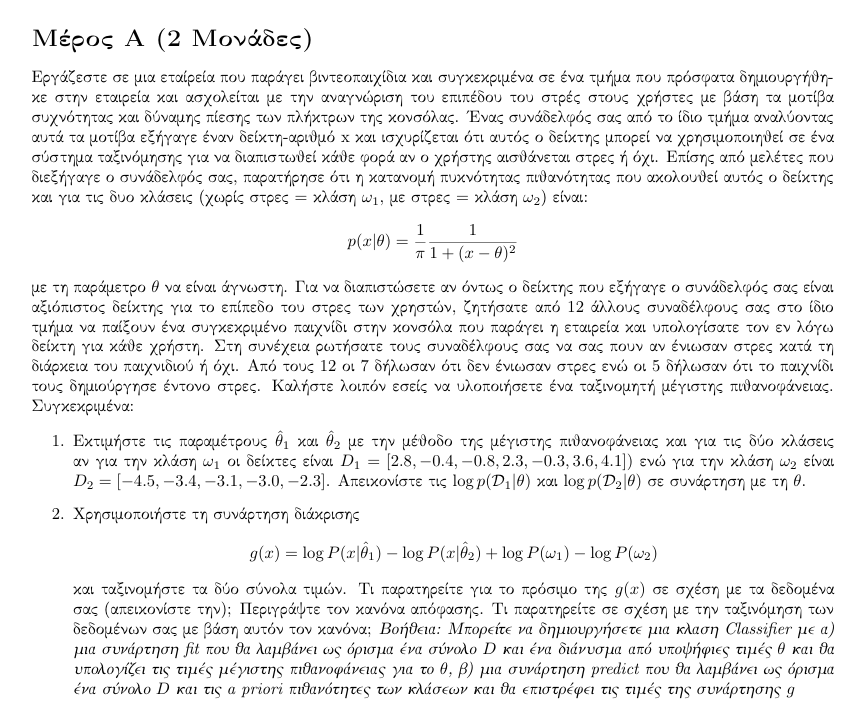

Question 1:


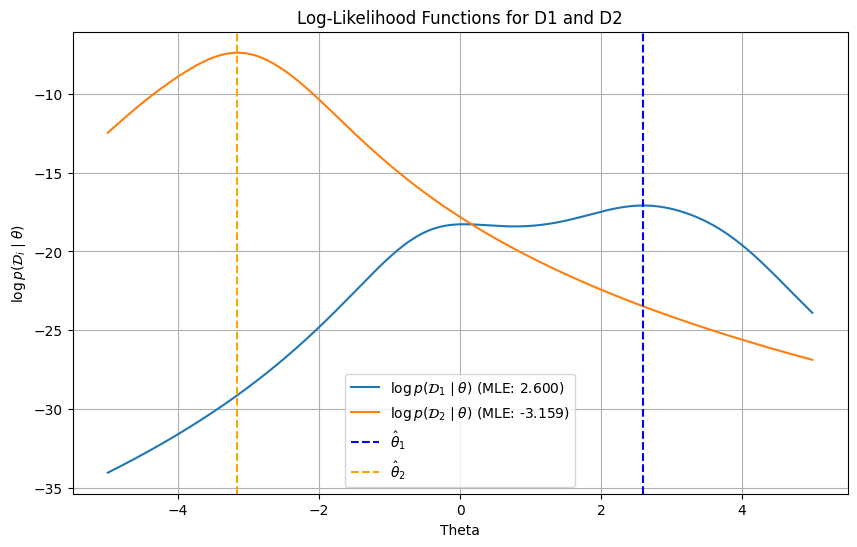

MLE Theta for D1: 2.5997599759976
MLE Theta for D2: -3.1588158815881586

Question 2:


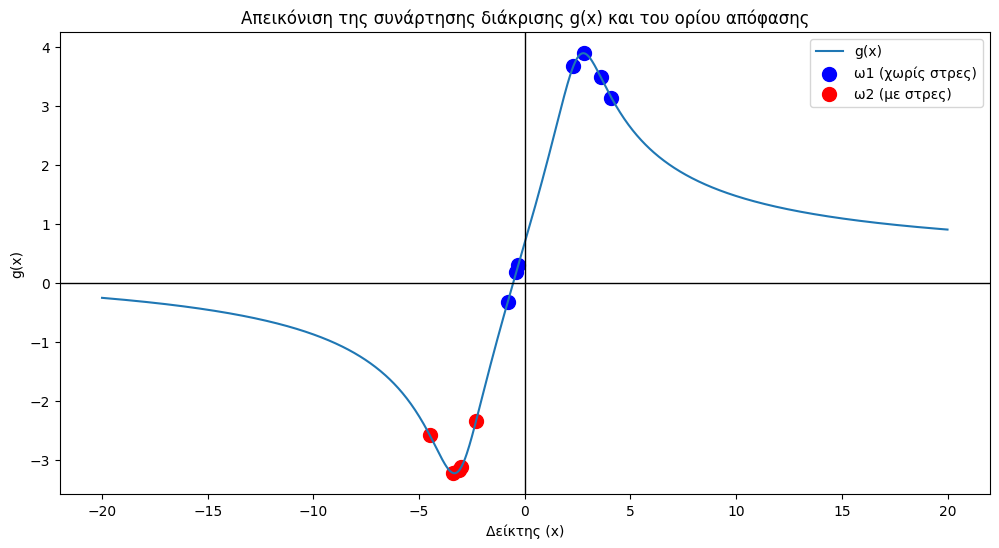

Misclassified Samples:
D1 (should be ω1): [-0.8]
No misclassified samples in D2.


In [3]:
# Part A
import numpy as np
import matplotlib.pyplot as plt

# Question 1
print("Question 1:")
# Datasets for the two classes
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Apply the maximum likelihood method for the estimation of unknown parameters theta
# Define the PDF of the given distribution
def pdf(x, theta):
    return 1 / (np.pi * (1 + (x - theta)**2))

# Define the log-likelihood function for a dataset
def log_likelihood(data, theta):
    return np.sum(np.log(pdf(data, theta)))

# Range of theta values for evaluation
theta_values = np.linspace(-5, 5, 10000)

# Compute the log-likelihoods for D1 and D2
log_likelihood_D1 = [log_likelihood(D1, theta) for theta in theta_values]
log_likelihood_D2 = [log_likelihood(D2, theta) for theta in theta_values]

# Find the theta that maximizes the log-likelihood (MLE estimate)
mle_theta_D1 = theta_values[np.argmax(log_likelihood_D1)]
mle_theta_D2 = theta_values[np.argmax(log_likelihood_D2)]

# Results
# Plot the log-likelihood functions
plt.figure(figsize=(10, 6))
plt.plot(theta_values, log_likelihood_D1,
         label=fr'$\log p(\mathcal{{D}}_1 \mid \theta)$ (MLE: {mle_theta_D1:.3f})')
plt.plot(theta_values, log_likelihood_D2,
         label=fr'$\log p(\mathcal{{D}}_2 \mid \theta)$ (MLE: {mle_theta_D2:.3f})')
plt.axvline(mle_theta_D1, color='blue', linestyle='--', label=fr'$\hat{{\theta}}_1$')
plt.axvline(mle_theta_D2, color='orange', linestyle='--', label=fr'$\hat{{\theta}}_2$')
plt.xlabel('Theta')
plt.ylabel(r'$\log p(\mathcal{D}_i \mid \theta)$')
plt.title('Log-Likelihood Functions for D1 and D2')
plt.legend()
plt.grid()
plt.show()

# Print MLE results
print(f"MLE Theta for D1: {mle_theta_D1}")
print(f"MLE Theta for D2: {mle_theta_D2}")
print("")

# Question 2
print("Question 2:")
# Define the classifier that uses Maximum Likelihood Estimation
class MLEClassifier:
    def __init__(self, D1, D2):
        self.D1 = D1
        self.D2 = D2
        self.theta1 = None
        self.theta2 = None
        self.p_omega1 = None
        self.p_omega2 = None

    def log_likelihood(self, x, theta):
        return -np.log(np.pi * (1 + (x - theta)**2))

    def estimate_theta(self, D):
        log_likelihoods = np.array([np.sum(self.log_likelihood(D, theta)) for theta in theta_values])
        best_theta = theta_values[np.argmax(log_likelihoods)]
        return best_theta, log_likelihoods

    def fit(self):
        self.theta1, _ = self.estimate_theta(self.D1)
        self.theta2, _ = self.estimate_theta(self.D2)
        self.p_omega1 = len(self.D1) / (len(self.D1) + len(self.D2))
        self.p_omega2 = len(self.D2) / (len(self.D1) + len(self.D2))

    def g(self, x):
        return np.log(self.p_omega1 / self.p_omega2) + np.log((1 + (x - self.theta2)**2) / (1 + (x - self.theta1)**2))

    def predict(self, D):
        g_vals = np.array([self.g(x) for x in D])
        return np.array(g_vals)

# Use the classifier
classifier = MLEClassifier(D1, D2)
classifier.fit()

# Define the range of x values for plotting the decision boundary
x_vals = np.linspace(-20, 20, 1000)

# Calculate the decision function values for the range of x values
g_vals = classifier.g(x_vals)

# Calculate g(x) for D1 and D2 samples
g_vals_D1 = classifier.predict(D1)
g_vals_D2 = classifier.predict(D2)

# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.plot(x_vals, g_vals, label='g(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.scatter(D1, g_vals_D1, color='blue', label='ω1 (χωρίς στρες)', s=100)
plt.scatter(D2, g_vals_D2, color='red', label='ω2 (με στρες)', s=100)
plt.xlabel('Δείκτης (x)')
plt.ylabel('g(x)')
plt.legend()
plt.title('Απεικόνιση της συνάρτησης διάκρισης g(x) και του ορίου απόφασης')
plt.show()

# Predict labels for D1 and D2 samples
predicted_labels_D1 = classifier.predict(D1)
predicted_labels_D2 = classifier.predict(D2)

# Define true labels for D1 (class ω1) and D2 (class ω2)
true_labels_D1 = np.ones(len(D1))
true_labels_D2 = np.ones(len(D2)) * (-1)


# Identify misclassified samples
misclassified_D1 = D1[predicted_labels_D1 < 0]
misclassified_D2 = D2[predicted_labels_D2 > 0]

# Display misclassified samples
print("Misclassified Samples:")
if len(misclassified_D1) > 0:
    print("D1 (should be ω1):", misclassified_D1)
else:
    print("No misclassified samples in D1.")
if len(misclassified_D2) > 0:
    print("D2 (should be ω2):", misclassified_D2)
else:
    print("No misclassified samples in D2.")



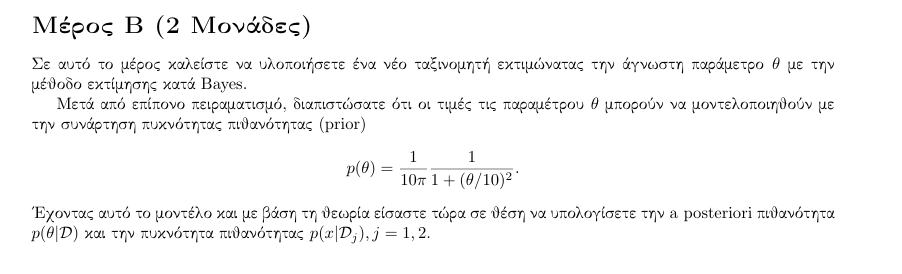

Question 1:


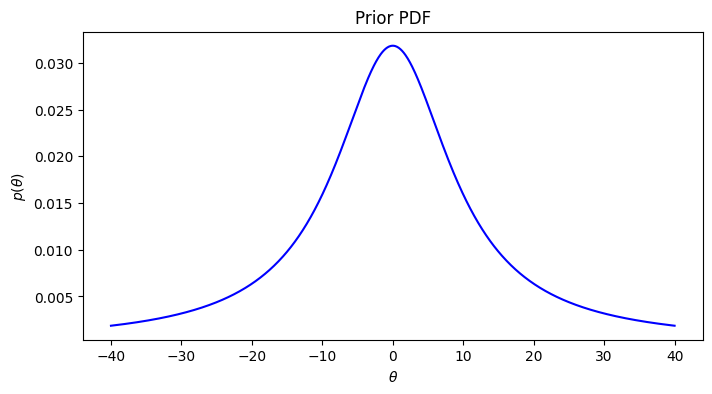

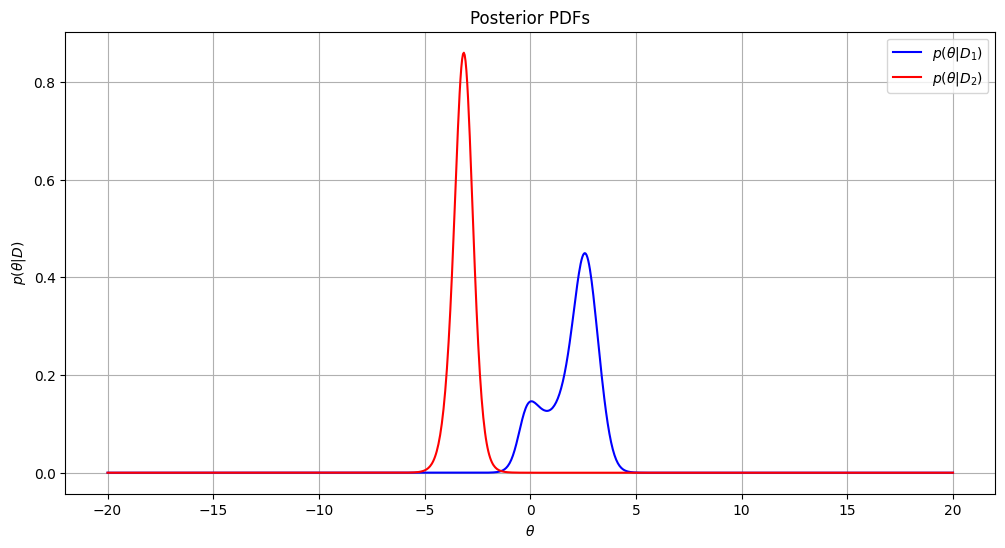

Question 2:


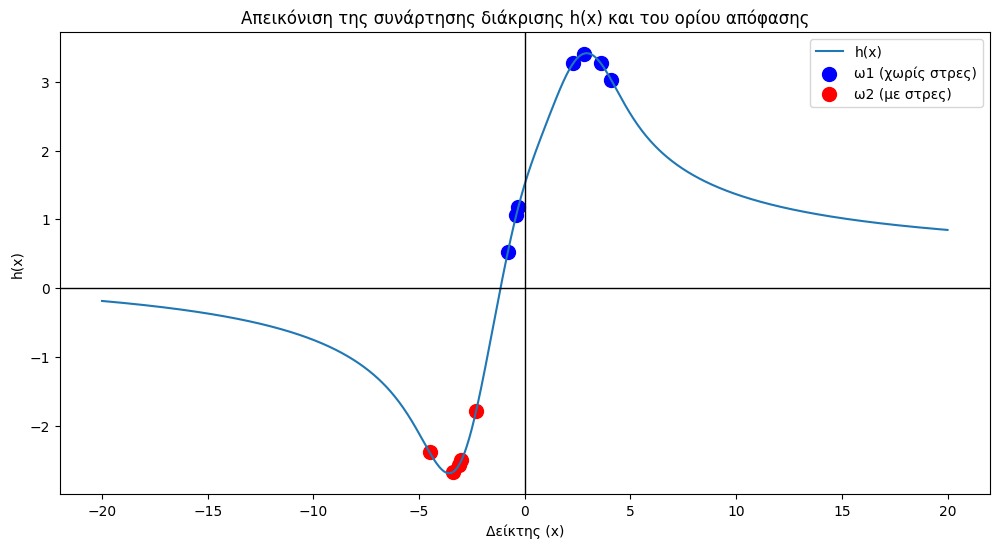

In [6]:
# Part B
import numpy as np
import matplotlib.pyplot as plt

# Datasets for the two classes
D1 = np.array([2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1])
D2 = np.array([-4.5, -3.4, -3.1, -3.0, -2.3])

# Define the classifier that uses Bayes Estimation Rule
class BayesianClassifier:
    def __init__(self, D1, D2):
        self.D1 = D1
        self.D2 = D2
        self.theta1 = None
        self.theta2 = None
        self.p_omega1 = None
        self.p_omega2 = None
        self.predictions = None

    def prior(self, theta):  # p(theta)
        return (1 / (10 * np.pi)) * (1 / (1 + (theta / 10)**2))

    def likelihood(self, x, theta):  # p(x|theta)
        return (1 / (np.pi * (1 + (x - theta)**2)))

    def integralTrapezoid(self, f: np.array, dx: float) -> float:
        return np.sum((f[1:] + f[:-1]) / 2 * dx)

    def fit(self):
        self.p_omega1 = len(self.D1) / (len(self.D1) + len(self.D2))
        self.p_omega2 = len(self.D2) / (len(self.D1) + len(self.D2))

        thetas = np.linspace(-20, 20, 1000)
        dtheta = thetas[1] - thetas[0]

        self.theta1 = self.calculate_posterior(self.D1, thetas)
        self.theta2 = self.calculate_posterior(self.D2, thetas)

    def calculate_posterior(self, D, thetas):
        dtheta = thetas[1] - thetas[0]
        probs_x_theta = np.array([self.likelihood(D, theta) for theta in thetas])
        probs_D_theta = np.prod(probs_x_theta, axis=1)
        probs_theta = self.prior(thetas)
        integral = self.integralTrapezoid(probs_D_theta * probs_theta, dtheta)
        posterior = (probs_D_theta * probs_theta) / integral
        return posterior

    def predict(self, x_vals):
        h_vals = []
        for x in x_vals:
            log_P_x_given_D1 = np.log(np.sum([self.likelihood(x, theta) * self.theta1[i] for i, theta in enumerate(np.linspace(-20, 20, 1000))]))
            log_P_x_given_D2 = np.log(np.sum([self.likelihood(x, theta) * self.theta2[i] for i, theta in enumerate(np.linspace(-20, 20, 1000))]))
            h_val = log_P_x_given_D1 - log_P_x_given_D2 + np.log(self.p_omega1) - np.log(self.p_omega2)
            h_vals.append(h_val)
        return np.array(h_vals)

# Use the classifier
classifier = BayesianClassifier(D1, D2)
classifier.fit()

# Question 1
print("Question 1:")

# Define the range of theta values for the posterior
theta_range = np.linspace(-20, 20, 1000)
# Plot prior PDF
plt.figure(figsize=(8, 4))
plt.plot(np.linspace(-40, 40, 1000), classifier.prior(np.linspace(-40, 40, 1000)), label=r"$p(\theta)$", color="blue")
plt.title("Prior PDF")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")

# Compute posterior PDFs
posterior_D1 = classifier.calculate_posterior(D1,theta_range)
posterior_D2 = classifier.calculate_posterior(D2,theta_range)

# Plot the posterior PDFs
plt.figure(figsize=(12, 6))

plt.plot(theta_range, posterior_D1, label=r"$p(\theta | D_1)$", color="blue")
plt.plot(theta_range, posterior_D2, label=r"$p(\theta | D_2)$", color="red")

plt.title("Posterior PDFs")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta | D)$")
plt.legend()
plt.grid()

plt.show()

# Question 2
print("Question 2:")
# Define the range of x values for plotting
x_vals = np.linspace(-20, 20, 1000)
h_vals = classifier.predict(x_vals)

# Calculate h(x) for D1 and D2 samples
h_vals_D1 = classifier.predict(D1)
h_vals_D2 = classifier.predict(D2)

plt.figure(figsize=(12, 6))
plt.plot(x_vals, h_vals, label='h(x)')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.scatter(D1, h_vals_D1, color='blue', label='ω1 (χωρίς στρες)', s=100)
plt.scatter(D2, h_vals_D2, color='red', label='ω2 (με στρες)', s=100)
plt.xlabel('Δείκτης (x)')
plt.ylabel('h(x)')
plt.legend()
plt.title('Απεικόνιση της συνάρτησης διάκρισης h(x) και του ορίου απόφασης')
plt.show()

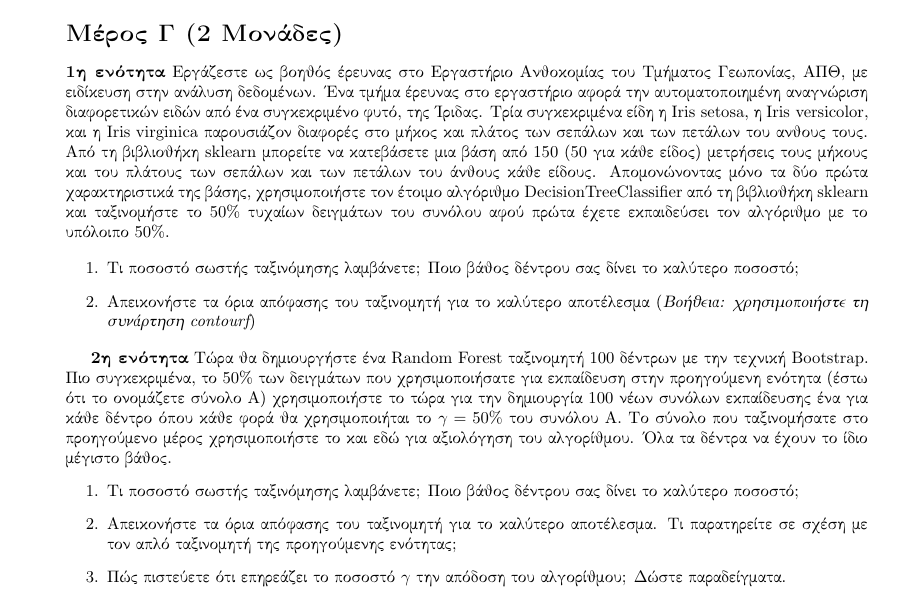

Section 1:
Depth 1: Accuracy = 0.64
Depth 2: Accuracy = 0.77
Depth 3: Accuracy = 0.79
Depth 4: Accuracy = 0.77
Depth 5: Accuracy = 0.77
Depth 6: Accuracy = 0.77
Depth 7: Accuracy = 0.73
Depth 8: Accuracy = 0.73
Depth 9: Accuracy = 0.73
Depth 10: Accuracy = 0.72
Depth 11: Accuracy = 0.71
Best depth for Decision Tree: 3 with accuracy: 0.79


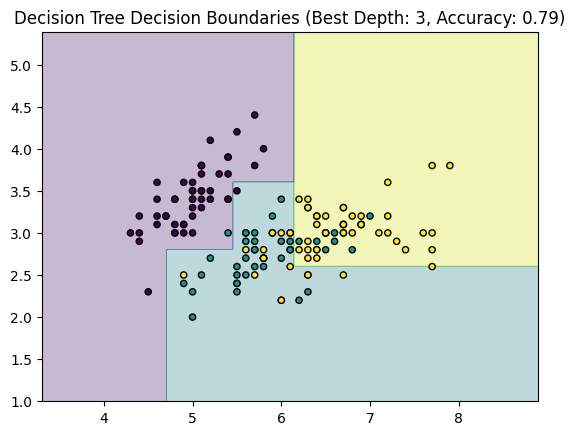

Section 2:
Depth 1: Accuracy = 0.76
Depth 2: Accuracy = 0.83
Depth 3: Accuracy = 0.80
Depth 4: Accuracy = 0.80
Depth 5: Accuracy = 0.79
Depth 6: Accuracy = 0.79
Depth 7: Accuracy = 0.79
Depth 8: Accuracy = 0.77
Depth 9: Accuracy = 0.79
Depth 10: Accuracy = 0.80
Depth 11: Accuracy = 0.76
Best depth for Random Forest: 2 with accuracy: 0.83


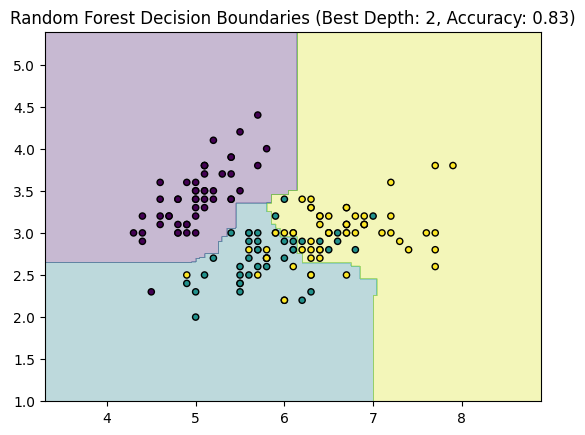

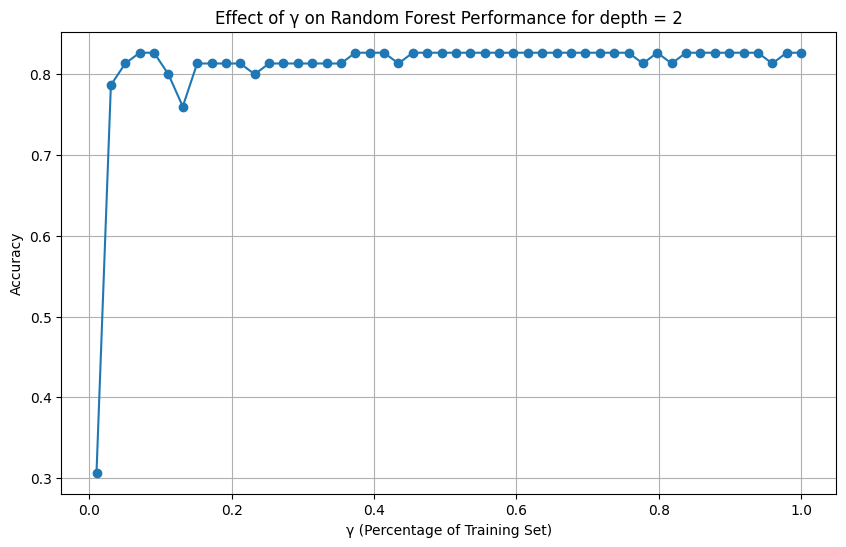

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Section 1
print("Section 1:")
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Split the dataset into training (50%) and testing (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Function to plot decision boundaries using contourf
def plot_decision_boundaries(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.show()

# Find the best depth for a Decision Tree
best_depth = 0
best_accuracy = 0

for depth in range(1, 12):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(f"Depth {depth}: Accuracy = {accuracy:.2f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"Best depth for Decision Tree: {best_depth} with accuracy: {best_accuracy:.2f}")

# Train the best Decision Tree
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
clf.fit(X_train, y_train)
accuracy_tree = clf.score(X_test, y_test)

# Visualize the decision boundaries for the Decision Tree
plot_decision_boundaries(clf, X, y, f"Decision Tree Decision Boundaries (Best Depth: {best_depth}, Accuracy: {accuracy_tree:.2f})")

# Section 2
print("Section 2:")
# Create a Random Forest classifier with 100 trees
n_trees = 100
gamma = 0.5  # 50% of the training set
n_samples = int(gamma * len(X_train))  # 50% of the training set

# Find the best depth for the Random Forest
best_rf_depth = 0
best_rf_accuracy = 0
rf_accuracies = []

for depth in range(1, 12):
    rf_clf = RandomForestClassifier(n_estimators=n_trees, max_depth=depth, bootstrap=True, random_state=42, max_samples=gamma)
    rf_clf.fit(X_train, y_train)
    accuracy = rf_clf.score(X_test, y_test)
    rf_accuracies.append(accuracy)
    print(f"Depth {depth}: Accuracy = {accuracy:.2f}")

    if accuracy > best_rf_accuracy:
        best_rf_accuracy = accuracy
        best_rf_depth = depth

print(f"Best depth for Random Forest: {best_rf_depth} with accuracy: {best_rf_accuracy:.2f}")

# Train the best Random Forest
rf_clf = RandomForestClassifier(n_estimators=n_trees, max_depth=best_rf_depth, bootstrap=True, random_state=42, max_samples=gamma)
rf_clf.fit(X_train, y_train)
accuracy_rf = rf_clf.score(X_test, y_test)

# Visualize the decision boundaries for the Random Forest
plot_decision_boundaries(rf_clf, X, y, f"Random Forest Decision Boundaries (Best Depth: {best_rf_depth}, Accuracy: {accuracy_rf:.2f})")

# Try different values of γ
gamma_values = np.linspace(0.01, 1, 50)
accuracies = []

for gamma in gamma_values:
    rf_clf = RandomForestClassifier(n_estimators=n_trees, max_depth=best_rf_depth, bootstrap=True, random_state=42, max_samples=gamma)
    rf_clf.fit(X_train, y_train)
    accuracy = rf_clf.score(X_test, y_test)
    accuracies.append(accuracy)

# Plot the accuracies for different values of γ
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, accuracies, marker='o')
plt.xlabel('γ (Percentage of Training Set)')
plt.ylabel('Accuracy')
plt.title(f'Effect of γ on Random Forest Performance for depth = {best_rf_depth}')
plt.grid(True)
plt.show()